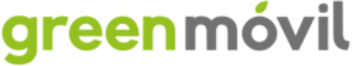



## **Prueba de Business Intelligence Specialist**


*   Nombre: Pablo Camilo Daza
*   CC 1014178608
*   Cel 321 3639687




## Librerias a utilizar para el desarrollo de la prueba

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Se extrae la información del archivo por medio de la Liberia Pandas, se realiza una revisión de la estructura de la data a trabajar


In [ ]:
Bd = pd.read_csv('/content/netflix_titles.csv', encoding='latin1')
Bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

### Identificamos que las columnas estan despues de description se encuentran vacia por lo tanto se procede a qutarlas del Dataset

In [ ]:
Columnas_con_datos= Bd.columns[:Bd.columns.get_loc('description') + 1].tolist()
Bd = Bd[Columnas_con_datos]
Bd = Bd[Bd['type'].isin(['TV Show', 'Movie'])]
Bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


### Eliminamos los registros que no tienen una fecha de agregación para reducir los errores al cargar los datos en la base de datos de PostgreSQL. Esta eliminación se realiza considerando que dichos registros no aportan un valor significativo que altere el sentido de la información.

In [ ]:
Bd = Bd.dropna(subset=['date_added'])
Bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8799 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8799 non-null   object
 1   type          8799 non-null   object
 2   title         8799 non-null   object
 3   director      6175 non-null   object
 4   cast          7974 non-null   object
 5   country       7969 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8799 non-null   int64 
 8   rating        8795 non-null   object
 9   duration      8796 non-null   object
 10  listed_in     8799 non-null   object
 11  description   8799 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.6+ KB


### Se ha identificado que en los datos proporcionados, las columnas de actores, directores, país y categoría contienen múltiples opciones. Por lo tanto, se decide iterar celda por celda en cada registro para extraer un listado de estas columnas. Esto permitirá implementar, en el proceso de carga de datos en PostgreSQL, el uso de llaves primarias y foráneas.


In [ ]:

actores = []

for index, row in Bd.iterrows():
  if isinstance(row['cast'], str):
    cast_lista = [actor.strip() for actor in row['cast'].split(',')]
    for actor in cast_lista:
      if actor not in actores:
        actores.append(actor)


df_actores = pd.DataFrame({'Actor': actores})
df_actores['ID_actores'] = df_actores.index + 1
df_actores = df_actores[['ID_actores', 'Actor']]

Directores = []

for index, row in Bd.iterrows():
  if isinstance(row['director'], str):
    director_lista = [director.strip() for director in row['director'].split(',')]
    for director in director_lista:
      if director not in Directores:
        Directores.append(director)


df_directores = pd.DataFrame({'Director': Directores})
df_directores['ID_director'] = df_directores.index + 1
df_directores = df_directores[['ID_director', 'Director']]

Paises = []

for index, row in Bd.iterrows():
  if isinstance(row['country'], str):
    paises_lista = [pais.strip() for pais in row['country'].split(',')]
    for pais in paises_lista:
      if pais not in Paises:
        Paises.append(pais)


df_paises = pd.DataFrame({'Pais': Paises})
df_paises['ID_pais'] = df_paises.index + 1
df_paises= df_paises[['ID_pais', 'Pais']]

Categorias = []

for index, row in Bd.iterrows():
  if isinstance(row['listed_in'], str):
    categorias_lista = [categoria.strip() for categoria in row['listed_in'].split(',')]
    for categoria in categorias_lista:
      if categoria not in Categorias:
        Categorias.append(categoria)


df_categoria = pd.DataFrame({'Categoria': Categorias})
df_categoria['ID_categoria'] = df_categoria.index + 1
df_categoria= df_categoria[['ID_categoria', 'Categoria']]

### Se exportan las bases en formato csv ya tratadas para el cargue en la bases

In [ ]:
df_directores.to_csv('df_directores.csv', index=False)
df_paises.to_csv('df_paises.csv', index=False)
df_categoria.to_csv('df_categoria.csv', index=False)
df_actores.to_csv('df_actores.csv', index=False)


### Para garantizar la integridad de los datos proporcionados, se crean las tablas que contendrán las llaves foráneas. Esto se lleva a cabo mediante una unión de la base de datos de Programas y las demas tablas de datos estraidas, considerando las llaves primarias establecidas en el script anterior.

In [ ]:
reparto = []

for index, row in Bd.iterrows():
  if isinstance(row['cast'], str):
    cast_lista = [actor.strip() for actor in row['cast'].split(',')]
    for actor in cast_lista:
      reparto.append([row['show_id'], actor])

df_reparto = pd.DataFrame(reparto, columns=['show_id', 'Actor'])
df_reparto = pd.merge(df_reparto, df_actores, on='Actor', how='left')
df_reparto = df_reparto[['show_id', 'ID_actores','Actor']]


dirigida = []

for index, row in Bd.iterrows():
  if isinstance(row['director'], str):
    director_lista = [director.strip() for director in row['director'].split(',')]
    for director in director_lista:
      dirigida.append([row['show_id'], director])

df_dirigida = pd.DataFrame(dirigida, columns=['show_id', 'Director'])
df_dirigida = pd.merge(df_dirigida, df_directores, on='Director', how='left')
df_dirigida = df_dirigida[['show_id', 'ID_director']]

pais_grabacion = []

for index, row in Bd.iterrows():
  if isinstance(row['country'], str):
    pais_lista = [pais.strip() for pais in row['country'].split(',')]
    for pais in pais_lista:
      pais_grabacion.append([row['show_id'], pais])

df_p_grabacion = pd.DataFrame(pais_grabacion, columns=['show_id', 'Pais'])
df_p_grabacion = pd.merge(df_p_grabacion, df_paises, on='Pais', how='left')
df_p_grabacion = df_p_grabacion[['show_id', 'ID_pais']]

Genero = []

for index, row in Bd.iterrows():
  if isinstance(row['listed_in'], str):
    genero_lista = [genero.strip() for genero in row['listed_in'].split(',')]
    for genero in genero_lista:
      Genero.append([row['show_id'], genero])

df_genero = pd.DataFrame(Genero, columns=['show_id', 'Categoria'])
df_genero = pd.merge(df_genero, df_categoria, on='Categoria', how='left')
df_genero = df_genero[['show_id', 'ID_categoria']]

### Exportamos las bases en csv para su posterior cargue en la base de datos


In [ ]:
df_reparto.to_csv('df_reparto.csv', index=False)
df_dirigida.to_csv('df_dirigida.csv', index=False)
df_p_grabacion.to_csv('df_p_grabacion.csv', index=False)
df_genero.to_csv('df_genero.csv', index=False)

### Se finaliza la limpieza de datos eliminando las columnas del conjunto de datos que se iteraron. Posteriormente, se exporta la base en formato CSV para su carga en PostgreSQL.

In [ ]:
Bd = Bd.drop(['listed_in', 'country', 'director', 'cast'], axis=1)
Bd.to_csv('Bd.csv', index=False)
Bd

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,"April 5, 2024",2024,TV-MA,1 Season,A new breed of parasitic aliens arrive on Eart...


Este código es una consulta SQL que selecciona las columnas show_id, tipo, rating y director de las tablas programas, dirigida_por y directores. Utiliza las cláusulas JOIN para combinar las tablas programas, dirigida_por y directores utilizando las relaciones show_id = show_id y dp.iddirector = d.iddirector. Esto permite obtener información sobre los programas, quién los dirige y el rating de cada programa.



```
SELECT p.show_id,p.tipo, p.rating, d.director
FROM programas as p
JOIN dirigida_por as dp ON p.show_id = dp.show_id
JOIN directores as d ON dp.iddirector = d.iddirector
;

```

